In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
#from skimage import io
from PIL import Image
import matplotlib.image as im
from numpy import asarray

In [2]:
train_images_data=[] #Load the Images in to List
train_images_labels=[] #Load the labels in to list

for i in os.listdir('C:/Users/admin/Desktop/train'): #Geting all the files from the directory
    if i.split('.')[1] == 'jpg': #finding the image
        #print(i)
        img = Image.open(os.path.join('C:/Users/admin/Desktop/train',i)) #loading the image
        #img=im.imread(os.path.join('/content/drive/MyDrive/project data/train',i))
        #np.asarray(img)
        img=img.resize((200,200)) #resize the images
        #print(img)
        img=np.array(img) #convert into array
        #print(img.shape)
        if(img.shape==(200,200)):
            #img=img.reshape((200,200,3))
            os.remove('C:/Users/admin/Desktop/train/'+i)#removing the appropriate dimention of image
        if(img.shape==(200,200,4)):
            c='C:/Users/admin/Desktop/train/'+i
            os.remove('C:/Users/admin/Desktop/train/'+i)#removing the 4 dimention image
        
        train_images_data.append(img)#appending all the images to list 
        train_images_labels.append(i.split('_')[0])# Spliting file names and storing the labels for image in list
print(train_images_data[0].shape)
train_images_labels = pd.get_dummies(train_images_labels).values  #Converting labels into One Hot encoded sparse matrix
train_images_data = np.array(train_images_data)# Converting images to array
print(train_images_data.shape)
# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images_data,train_images_labels,random_state=1)

(200, 200, 3)
(214, 200, 200, 3)


In [3]:
test_images_data=[] #Load the Images in to List
test_images_labels=[] #Load the labels in to list

for i in os.listdir('C:/Users/admin/Desktop/test'): #Geting all the files from the directory
    if i.split('.')[1] == 'jpg': #finding the image
        img = Image.open(os.path.join('C:/Users/admin/Desktop/test',i)) #loading the image
        #img = im.imread(os.path.join('/content/drive/MyDrive/project data/test',i))
        img = img.resize((200,200)) #resize the images
        img=np.array(img) #convert into array
        print(img.shape)
        if(img.shape==(200,200)):
            #img=img.reshape((200,200,3))
            os.remove('C:/Users/admin/Desktop/test/'+i) ##removing the appropriate dimention of the image
        if(img.shape==(200,200,4)):
            #print(i)
            c='C:/Users/admin/Desktop/test/'+i
            os.remove('C:/Users/admin/Desktop/test/'+i) #removing the 4 dimention image
        #img=img.reshape((200,200,1))
        test_images_data.append(img) #appending all the images to list 
        test_images_labels.append(i.split('_')[0]) # Spliting file names and storing the labels for image in list
test_images_data = np.array(test_images_data) # Converting images to array
test_images_labels = pd.get_dummies(test_images_labels).values #Converting labels into One Hot encoded sparse matrix

(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)


[1 0 0 0]


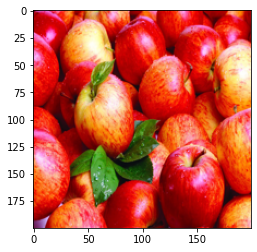

In [22]:
#Visualizing the Training data
print(train_images_labels[20])#print the label
plt.imshow(train_images_data[20])#showing the image

In [6]:
# Creating a Sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten
model = tf.keras.Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 30)      8670      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 30)        8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 30)        8130      
_________________________________________________________________
flatten (Flatten)            (None, 63480)             0

In [7]:
# Training the model
history = model.fit(x_train,y_train,epochs=20,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/20
4/4 [==============================] - 13s 3s/step - loss: 6.9365 - acc: 0.3562 - val_loss: 1.9703 - val_acc: 0.4259
Epoch 2/20
4/4 [==============================] - 12s 3s/step - loss: 3.5692 - acc: 0.3750 - val_loss: 7.9704 - val_acc: 0.3148
Epoch 3/20
4/4 [==============================] - 13s 3s/step - loss: 5.7869 - acc: 0.3938 - val_loss: 2.4774 - val_acc: 0.4815
Epoch 4/20
4/4 [==============================] - 12s 3s/step - loss: 2.8397 - acc: 0.5500 - val_loss: 1.0922 - val_acc: 0.7037
Epoch 5/20
4/4 [==============================] - 12s 3s/step - loss: 1.7149 - acc: 0.7000 - val_loss: 1.4457 - val_acc: 0.7037
Epoch 6/20
4/4 [==============================] - 12s 3s/step - loss: 1.3845 - acc: 0.6687 - val_loss: 1.0103 - val_acc: 0.7407
Epoch 7/20
4/4 [==============================] - 13s 3s/step - loss: 0.8458 - acc: 0.8562 - val_loss: 1.0349 - val_acc: 0.7407
Epoch 8/20
4/4 [==============================] - 12s 3s/step - loss: 0.7749 - acc: 0.7750 - val_loss: 1

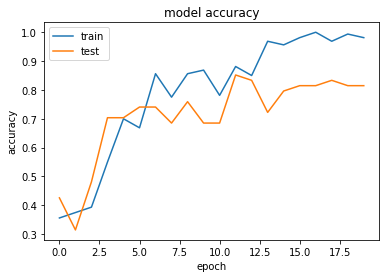

In [8]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

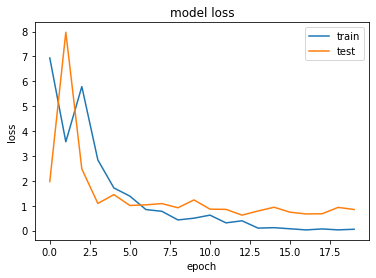

In [9]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [10]:
# Evaluating model on validation data
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

2/2 [==============================] - 1s 361ms/step - loss: 0.8478 - acc: 0.8148
[0.8478066325187683, 0.8148148059844971]


Actual :-  [[1 0 0 0]]
Predicted :-  apple


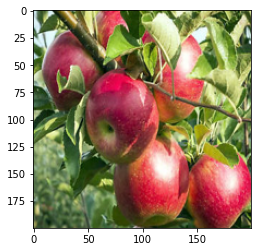

In [11]:
# Testing predictions and the actual label
image = test_images_data[0:1]
label = test_images_labels[0:1]

prediction = model.predict(np.array(image))

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",label)
print("Predicted :- ",output[np.argmax(prediction)])
plt.imshow(test_images_data[0])

Actual :-  [[0 1 0 0]]
Predicted :-  banana


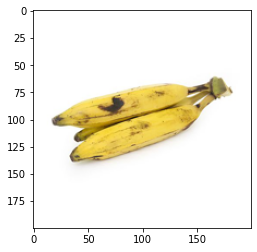

In [12]:
# Testing predictions and the actual label
image = test_images_data[20:21]
label = test_images_labels[20:21]

prediction = model.predict(np.array(image))

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",label)
print("Predicted :- ",output[np.argmax(prediction)])
plt.imshow(test_images_data[20])

In [29]:
import pygame
import pygame.camera
import time
pygame.init()
pygame.camera.init()
cam = pygame.camera.Camera(0,(1280, 720))
cam.start()
time.sleep(0.5)  # You might need something higher in the beginning
img = cam.get_image()
pygame.image.save(img, "C:/Users/admin/Desktop/pypypy/abc.jpg")
cam.stop()
del cam
pygame.quit()

In [19]:
#Load the image
img = Image.open(os.path.join('C:/Users/admin/Desktop/pypypy/abc.jpg'))
img=img.resize((200,200))
img=np.array(img)
#img.shape
a=np.reshape(np.ravel(img),(1,200,200,3))
a.shape

(1, 200, 200, 3)

Predicted :-  banana


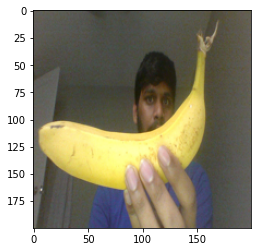

In [20]:
#Prediction of model
prediction = model.predict(a)
print("Predicted :- ",output[np.argmax(prediction)])
plt.imshow(img)

In [21]:
history = model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
4/4 [==============================] - 16s 4s/step - loss: 0.0139 - acc: 1.0000 - val_loss: 0.7584 - val_acc: 0.7963
Epoch 2/50
4/4 [==============================] - 14s 3s/step - loss: 0.0126 - acc: 1.0000 - val_loss: 0.7405 - val_acc: 0.7963
Epoch 3/50
4/4 [==============================] - 14s 3s/step - loss: 0.0102 - acc: 1.0000 - val_loss: 0.8243 - val_acc: 0.7778
Epoch 4/50
4/4 [==============================] - 14s 3s/step - loss: 0.0090 - acc: 1.0000 - val_loss: 0.8308 - val_acc: 0.7963
Epoch 5/50
4/4 [==============================] - 14s 4s/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.8224 - val_acc: 0.7963
Epoch 6/50
4/4 [==============================] - 13s 3s/step - loss: 0.0058 - acc: 1.0000 - val_loss: 0.8153 - val_acc: 0.8148
Epoch 7/50
4/4 [==============================] - 14s 3s/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.8237 - val_acc: 0.8148
Epoch 8/50
4/4 [==============================] - 14s 3s/step - loss: 0.0051 - acc: 1.0000 - val_loss: 0

In [23]:
history = model.fit(x_train,y_train,epochs=100,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/100
4/4 [==============================] - 18s 5s/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.7942 - val_acc: 0.8333
Epoch 2/100
4/4 [==============================] - 14s 4s/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.7937 - val_acc: 0.8333
Epoch 3/100
4/4 [==============================] - 13s 3s/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.7945 - val_acc: 0.8333
Epoch 4/100
4/4 [==============================] - 13s 3s/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.7986 - val_acc: 0.8333
Epoch 5/100
4/4 [==============================] - 13s 3s/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.8043 - val_acc: 0.8333
Epoch 6/100
4/4 [==============================] - 13s 3s/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.8074 - val_acc: 0.8333
Epoch 7/100
4/4 [==============================] - 15s 4s/step - loss: 9.8758e-04 - acc: 1.0000 - val_loss: 0.8104 - val_acc: 0.8333
Epoch 8/100
4/4 [==============================] - 14s 3s/step - loss: 9.7563e-04 - acc: 1.00

In [24]:
# Evaluating model on validation data
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

2/2 [==============================] - 1s 374ms/step - loss: 0.8384 - acc: 0.8333
[0.8384284973144531, 0.8333333134651184]


In [26]:
history = model.fit(x_train,y_train,epochs=10,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/10
4/4 [==============================] - 14s 3s/step - loss: 2.9186e-04 - acc: 1.0000 - val_loss: 0.8409 - val_acc: 0.8333
Epoch 2/10
4/4 [==============================] - 16s 4s/step - loss: 2.8934e-04 - acc: 1.0000 - val_loss: 0.8423 - val_acc: 0.8148
Epoch 3/10
4/4 [==============================] - 14s 3s/step - loss: 2.8678e-04 - acc: 1.0000 - val_loss: 0.8432 - val_acc: 0.8148
Epoch 4/10
4/4 [==============================] - 15s 4s/step - loss: 2.8419e-04 - acc: 1.0000 - val_loss: 0.8413 - val_acc: 0.8148
Epoch 5/10
4/4 [==============================] - 14s 4s/step - loss: 2.8011e-04 - acc: 1.0000 - val_loss: 0.8377 - val_acc: 0.8148
Epoch 6/10
4/4 [==============================] - 14s 3s/step - loss: 2.7726e-04 - acc: 1.0000 - val_loss: 0.8351 - val_acc: 0.8148
Epoch 7/10
4/4 [==============================] - 14s 4s/step - loss: 2.7544e-04 - acc: 1.0000 - val_loss: 0.8338 - val_acc: 0.8333
Epoch 8/10
4/4 [==============================] - 14s 3s/step - loss: 2.7240